By 

#### Bernardo Vimpi
May 2020

### CLUSTER ANALYSIS

##### PROJECT OBJECTIVE AND SCOPE

This is a very small project. I use Kmeans clusters to analyse a small group of countries from different continents. The sample is small and this means that this project will be short in scope as well. The major goal here is to cluster the countries in different clusters based on variables such as Language, Latitude and Longitude.In doing so, I incorporate Kmeans Clustering and do some additional analysis. 

###### Import libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Data Load

In [107]:
data =pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Data Plot

<function matplotlib.pyplot.show(*args, **kw)>

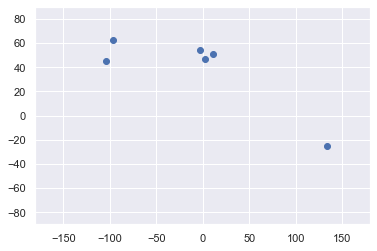

In [108]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

##### SELECT THE FEATURES

In [109]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### CLUESTERING

In [110]:
kmeans = KMeans(2)

In [111]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### CLUESTERING RESULTS

In [112]:
identified_clusters =kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [113]:
data_with_clusters =data.copy()
data_with_clusters['Cluster'] =identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


Australia is alone in cluster 1 while all the other countries are in cluster 0.

#### SCATTERPLOT with KMean Clustering

<function matplotlib.pyplot.show(*args, **kw)>

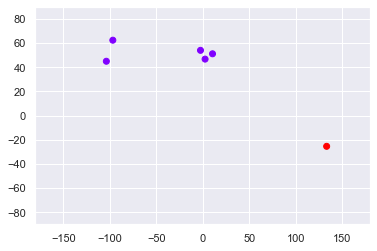

In [114]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

We can also change the  number of clusters from 2 to 3, for instance, as shown below and run the codes again.

##### Changing the number of clusters

In [115]:
kmeans = KMeans(3)# I changed the number of clusters to 3. It was previously 2.
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### CLUSTERIG RESULTS 2

In [116]:
identified_clusters =kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [117]:
data_with_clusters =data.copy()
data_with_clusters['Cluster'] =identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


Now we see there are three clusters (0,1,and 2)

###### SCATTERPLOT WITH KMEAN CLUSTERING 2

<function matplotlib.pyplot.show(*args, **kw)>

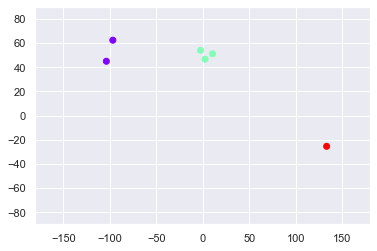

In [118]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

Now, there are three colors represing each of the clusters.

Lets use the "Language" variable in our analysis

###  DATA MAPPING 

In [119]:
data_mapped =data.copy()
data_mapped['Language'] =data_mapped['Language'].map({'English' :0, 'French' :1, 'German' :2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### SELECT THE FEATURES

In [120]:
x= data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


####  CLUSTERING

Lets reuse the code above

In [121]:
kmeans = KMeans(3)# I changed the number of clusters to 3. It was previously 2.
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### CLUSTERING RESULTS 3

In [122]:
identified_clusters =kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 0, 2, 0])

In [123]:
data_with_clusters =data.copy()
data_with_clusters['Cluster'] =identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


###### CLUSTERING WITH KMEANS CLUSTER 3

<function matplotlib.pyplot.show(*args, **kw)>

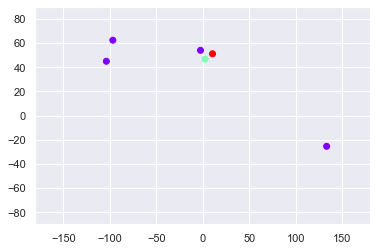

In [124]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

###### WITHIN CLUSTERS SUMM OF SQUARES (WCSS)

In [125]:
kmeans.inertia_ #the results will vay based on the number of clusters specified earlier

0.0

In [126]:
wcss = []

for i in range (1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
   

C:\Users\bev\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\bev\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  """
C:\Users\bev\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  """


In [127]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

##### THE ELBOW METHOD

Text(0, 0.5, 'Within-Cluster Sum of Squares')

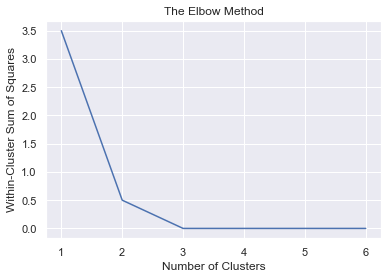

In [128]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title ('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

There are two points that could be the elbow: at ( 2, 0.5) and (3, 0.0). A 3 clusters solution is the best in this case since anything above which there is no much to gain from. A 2 cluster solution would be suboptimal as the lip from 2 to 3 is very big.

Thank you
##### Bernardo Vimpi
May 2020